In [1]:
import numpy as np
import pandas as pd

In [2]:
import tensorflow as tf

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from scipy.stats import skew

In [6]:
from sklearn.metrics import r2_score

In [7]:
df=pd.read_csv("Real estate.csv")

In [8]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [9]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

In [10]:
df.shape

(414, 8)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
No                                        414 non-null int64
X1 transaction date                       414 non-null float64
X2 house age                              414 non-null float64
X3 distance to the nearest MRT station    414 non-null float64
X4 number of convenience stores           414 non-null int64
X5 latitude                               414 non-null float64
X6 longitude                              414 non-null float64
Y house price of unit area                414 non-null float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [12]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

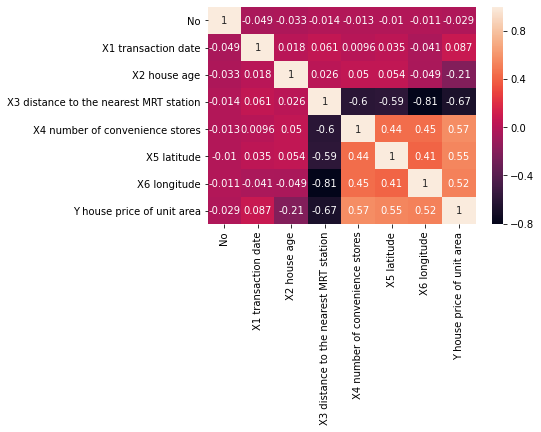

In [13]:
sns.heatmap(df.corr(),annot=True)
plt.show()

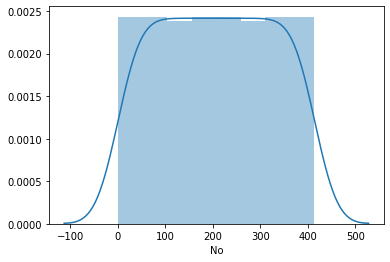

0.0


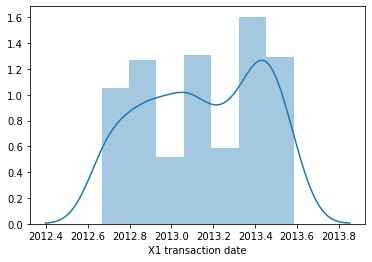

-0.1500256905888924


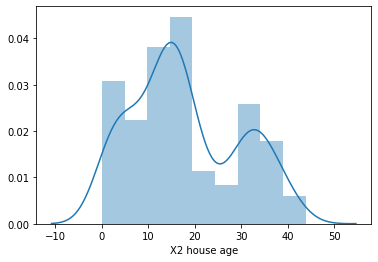

0.38153741817729087


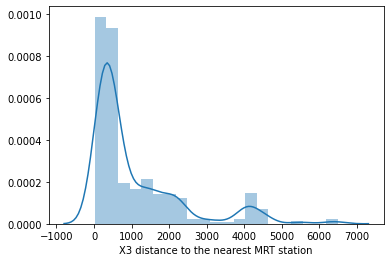

1.8819063601148036


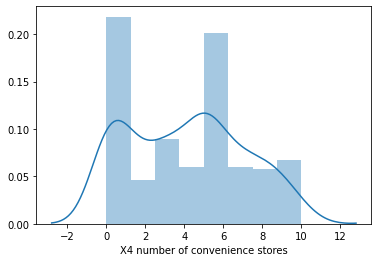

0.1540458341286463


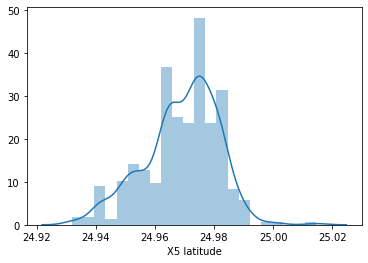

-0.43700771816804596


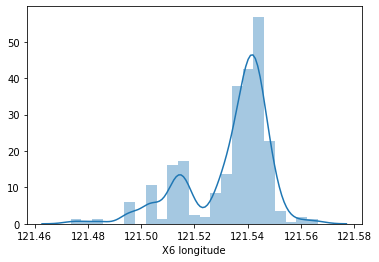

-1.2151682334072738


In [14]:
for col in df:
    if col!="Y house price of unit area":
        plt.figure()
        sns.distplot(df[col])
        plt.show()
        print(skew(df[col]))

In [15]:
for col in df:
    if col!="Y house price of unit area":
        print(col,':',skew(df[col]))

No : 0.0
X1 transaction date : -0.1500256905888924
X2 house age : 0.38153741817729087
X3 distance to the nearest MRT station : 1.8819063601148036
X4 number of convenience stores : 0.1540458341286463
X5 latitude : -0.43700771816804596
X6 longitude : -1.2151682334072738


In [16]:
for col in df:
    if skew(df[col]) >= 0.1 or skew(df[col]) <= -0.1 :
        if col!="Y house price of unit area":
            print(col,':',skew(df[col]))

X1 transaction date : -0.1500256905888924
X2 house age : 0.38153741817729087
X3 distance to the nearest MRT station : 1.8819063601148036
X4 number of convenience stores : 0.1540458341286463
X5 latitude : -0.43700771816804596
X6 longitude : -1.2151682334072738


In [17]:
df["X1 transaction date"]=np.sqrt(df["X1 transaction date"])
df["X2 house age"]=np.sqrt(df["X2 house age"])       
df["X3 distance to the nearest MRT station"]=np.sqrt(df["X3 distance to the nearest MRT station"])

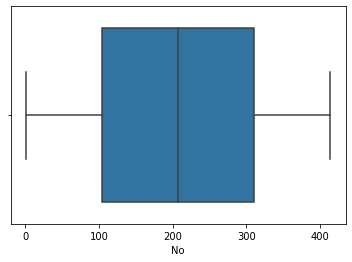

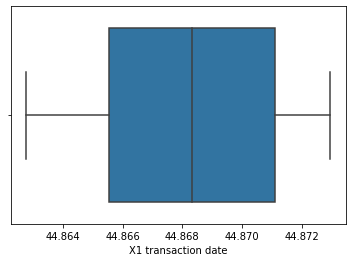

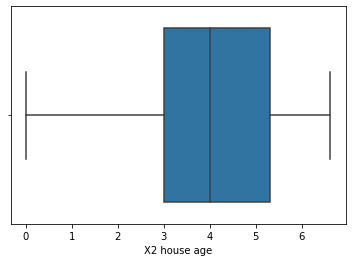

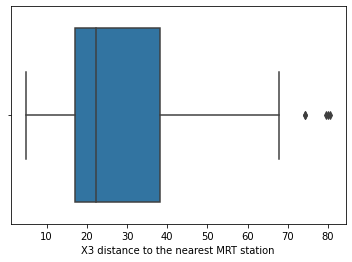

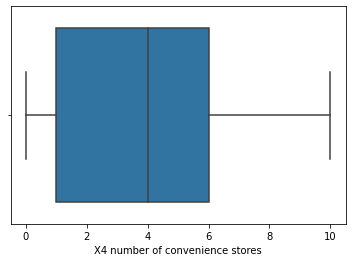

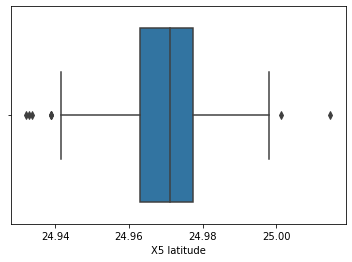

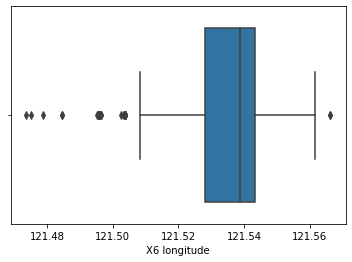

In [18]:
for col in df:
     if col!="Y house price of unit area":
        plt.figure()
        sns.boxplot(df[col])
        plt.show()

In [19]:
s = df['X3 distance to the nearest MRT station']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [20]:
len(outliers1)

5

In [21]:
a=list(outliers1.keys())
df.drop(a,inplace=True)

In [22]:
s = df['X5 latitude']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers2 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [23]:
len(outliers2)

8

In [24]:
b=list(outliers2.keys())
df.drop(b,inplace=True)

In [25]:
s = df['X6 longitude']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers3 = dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [26]:
len(outliers3)

29

In [27]:
c=list(outliers3.keys())
df.drop(c,inplace=True)

In [28]:
df.shape

(372, 8)

In [29]:
X=df.drop("Y house price of unit area",axis=1)
Y=df["Y house price of unit area"]

In [30]:
X.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude
0,1,44.865544,5.656854,9.212970,10,24.98298,121.54024
1,2,44.865544,4.415880,17.509846,9,24.98034,121.53951
2,3,44.872965,3.646917,23.706212,5,24.98746,121.54391
3,4,44.872040,3.646917,23.706212,5,24.98746,121.54391
4,5,44.864607,2.236068,19.762803,5,24.97937,121.54245


In [31]:
Y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

In [32]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [33]:
ss=StandardScaler()

In [34]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [35]:
model=tf.keras.Sequential([
      tf.keras.layers.Dense(1,input_shape=(X.shape[1],))
])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 8         
Total params: 8
Trainable params: 8
Non-trainable params: 0
_________________________________________________________________


In [37]:
model.compile(optimizer="sgd",loss="mse")

In [38]:
trained_model=model.fit(X_train_ss,Y_train,epochs=50)

Epoch 1/50
9/9 [==============================] - 0s 5ms/step - loss: 1551.3376
Epoch 2/50
9/9 [==============================] - 0s 5ms/step - loss: 1091.9302
Epoch 3/50
9/9 [==============================] - 0s 4ms/step - loss: 765.6521
Epoch 4/50
9/9 [==============================] - 0s 4ms/step - loss: 554.4420
Epoch 5/50
9/9 [==============================] - 0s 5ms/step - loss: 409.7123
Epoch 6/50
9/9 [==============================] - 0s 4ms/step - loss: 310.9445
Epoch 7/50
9/9 [==============================] - 0s 4ms/step - loss: 235.1348
Epoch 8/50
9/9 [==============================] - 0s 3ms/step - loss: 187.9780
Epoch 9/50
9/9 [==============================] - 0s 4ms/step - loss: 153.4266
Epoch 10/50
9/9 [==============================] - 0s 3ms/step - loss: 128.9642
Epoch 11/50
9/9 [==============================] - 0s 3ms/step - loss: 112.8157
Epoch 12/50
9/9 [==============================] - 0s 3ms/step - loss: 101.6846
Epoch 13/50
9/9 [==============================

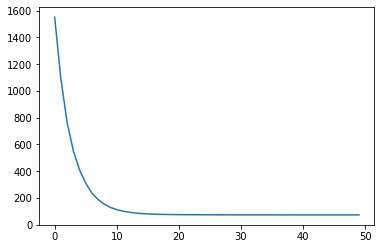

In [39]:
plt.plot(trained_model.history["loss"])
plt.show()

In [40]:
Y_pred=model.predict(X_test_ss)

In [41]:
print(r2_score(Y_test,Y_pred))

0.7168053411717117
